In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# from worldcloud import Worldcloud

In [294]:
df=pd.read_csv("netflix.csv")

In [295]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [296]:
df.rename(columns={"listed_in":"genre"},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [297]:
df.drop(columns='show_id',inplace=True)

In [298]:
df.duplicated().sum()

0

In [299]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   genre         8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [301]:
df["date_added"]=pd.to_datetime(df["date_added"],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       7976 non-null   object        
 5   date_added    8709 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8803 non-null   object        
 8   duration      8804 non-null   object        
 9   genre         8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 757.0+ KB


In [302]:
# subset is deleting the null values in cloumns
df.dropna(subset=["date_added"],inplace=True)
df["date_added"].isna().sum()

0

In [303]:
df.dropna(subset=["rating"],inplace=True)
df["rating"].isna().sum()

0

In [304]:
df.dropna(subset=["duration"],inplace=True)
df["duration"].isna().sum()

0

In [305]:
# Adding day,month,year,month_name,day_name as seperate columns to the data frame
df["day"]=df["date_added"].dt.day
df["month"]=df["date_added"].dt.month
df["year"]=df["date_added"].dt.year
df["month_name"]=df["date_added"].dt.month_name()
df["weekday"]=df["date_added"].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [306]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [307]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.nan)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [308]:
df.dropna(subset=["rating"],inplace=True)
df["rating"].isna().sum()

0

In [309]:
df.isna().sum()

type               0
title              0
director        2535
cast             800
country          826
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
day                0
month              0
year               0
month_name         0
weekday            0
dtype: int64

In [310]:
df[(df["director"].isna())&(df["country"].isna())&(df["cast"].isna())].shape[0]

96

In [311]:
#We found out that total 96 such rows are there which dont have director,country and cast as null,so deleting those rows
df.shape

(8621, 16)

In [312]:
df.dropna(subset=["director","country","cast"],how="all",inplace=True)
df.shape

(8525, 16)

In [313]:
df_cast=pd.DataFrame(df["cast"].apply(lambda x: str(x).split(', ')).tolist(),index=df["title"])

In [314]:
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [315]:
df_cast=df_cast.stack()

In [316]:
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 63644, dtype: object

In [317]:
df_cast=pd.DataFrame(df_cast)

In [318]:
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[63644 rows x 1 columns]

In [319]:
df_cast.reset_index(inplace=True)

In [320]:
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
63639,Zubaan,3,Manish Chaudhary
63640,Zubaan,4,Meghna Malik
63641,Zubaan,5,Malkeet Rauni
63642,Zubaan,6,Anita Shabdish


In [321]:
df_cast=df_cast[["title",0]]

In [322]:
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [323]:
df_cast.columns=["title","cast"]

In [324]:
df_cast.replace("nan",np.nan,inplace=True)

In [325]:
df_cast.isna().sum()

title      0
cast     704
dtype: int64

In [326]:
df_genre=pd.DataFrame(df["genre"].apply(lambda x: str(x).split(', ')).tolist(),index=df["title"])
df_genre=df_genre.stack()
df_genre=pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre=df_genre[["title",0]]
df_genre.columns=["title","genre"]
df_genre.replace("nan",np.nan,inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [327]:
df_director=pd.DataFrame(df["director"].apply(lambda x: str(x).split(', ')).tolist(),index=df["title"])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[["title",0]]
df_director.columns=["title","director"]
df_director.replace("nan",np.nan,inplace=True)
df_director.isna().sum()

title          0
director    2439
dtype: int64

In [328]:
df_country=pd.DataFrame(df["country"].apply(lambda x: str(x).split(', ')).tolist(),index=df["title"])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country=df_country[["title",0]]
df_country.columns=["title","country"]
df_country.replace("nan",np.nan,inplace=True)
df_country.isna().sum()

title        0
country    730
dtype: int64

In [329]:
df12= df_cast.merge(df_genre, on ="title")
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
146662,Zubaan,Anita Shabdish,International Movies
146663,Zubaan,Anita Shabdish,Music & Musicals
146664,Zubaan,Chittaranjan Tripathy,Dramas
146665,Zubaan,Chittaranjan Tripathy,International Movies


In [330]:
df123=df_director.merge(df12, on="title")
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
158309,Zubaan,Mozez Singh,Anita Shabdish,International Movies
158310,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
158311,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
158312,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [331]:
df1234=df_country.merge(df123, on="title") # only common column merge the other column
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
198399,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
198400,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [332]:
df_new=df.merge(df1234, on= "title")
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198399,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
198400,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [333]:
df_new.drop(columns=["cast_x","country_x","director_x","genre_x"],inplace=True)
df_new.rename(columns={"country_y":"country","director_y":"director",
                       "cast_y":"cast","genre_y":"genre"},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [334]:
df_new["cast"]=df_new["cast"].replace(np.nan,"Unknown")
df_new["country"]=df_new["country"].replace(np.nan,"Unknown")
df_new["director"]=df_new["director"].replace(np.nan,"Unknown")

In [335]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [336]:
df_new.drop_duplicates(keep="first",inplace=True)

In [337]:
df_new.shape

(198349, 16)

In [338]:
df_movies=df_new.loc[df_new["type"]=="Movie"]
df_tvs=df_new.loc[df_new["type"]=="TV Show"]

In [339]:
df_movies.shape

(144240, 16)

In [340]:
df_tvs.shape

(54109, 16)

In [341]:
#the duration column has values such as 90 mintues for movies and 2 seasons for tv shows,so we will removed the world their respective dataframes
df_movies["duration"]=df_movies["duration"].str.replace("min","")
df_movies.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [342]:
df_tvs["duration"]=df_tvs["duration"].str.replace("Seasons","")
df_tvs["duration"]=df_tvs["duration"].str.replace("Season","")
df_tvs.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [343]:
df_tvs.rename(columns={"duration":"seasons"},inplace=True)

In [344]:
df_tvs.head()

,type,title,date_added,release_year,rating,seasons,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [345]:
df_new.groupby("type")["type"].count()

type
Movie      144240
TV Show     54109
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x220120c84a0>,
 [Text(-1.2439211395986822, 1.4361964344961713, 'Movie'),
  Text(0.7201648702939739, -0.8314821462872573, 'TV Show')],
 [Text(-0.9165734712832396, 1.0582500043656, '73%'),
  Text(0.39281720197853115, -0.4535357161566857, '27%')])

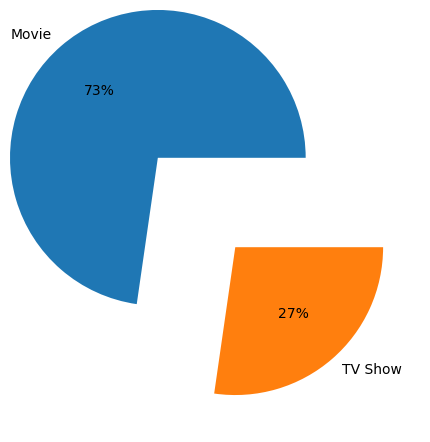

In [346]:
# labels=["Movie","TV Show"]
plt.pie(df_new["type"].value_counts(),labels=df_new["type"].value_counts().index,
        explode=(0.80,0), autopct = "%0.0f%%")

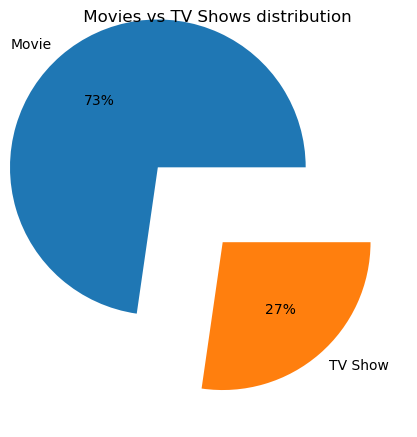

In [347]:
labels=["Movie","TV Show"]
plt.pie(df_new["type"].value_counts(),labels=df_new["type"].value_counts().index,
        explode=(0.67,0), autopct = "%0.0f%%")
plt.suptitle(" Movies vs TV Shows distribution")
plt.show()

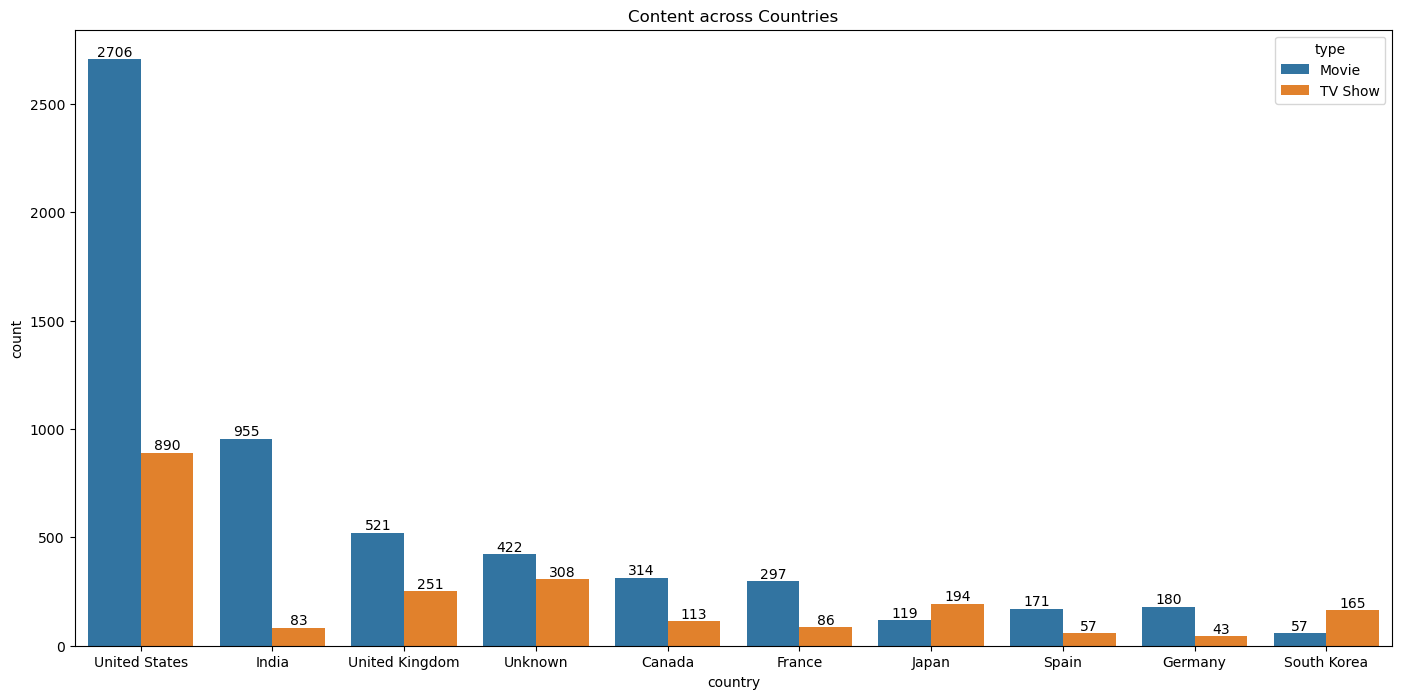

In [348]:
df_temp=df_new.drop_duplicates(subset=["country","title"])

x=df_temp["country"].value_counts().head(10)

plt.figure(figsize = (17,8))
plt.title("Content across Countries")
label=sns.countplot(data= df_temp, x= "country", hue="type",order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()

In [349]:
df_movies_temp=df_movies.drop_duplicates(subset=["director","title"])
df_tvs_temp=df_tvs.drop_duplicates(subset=["director","title"])

In [350]:
df_movies_temp

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
167,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,José Luis Ucha,Vanessa Hudgens,Children & Family Movies
177,Movie,Sankofa,2021-09-24,1993,Adults,125,"On a photo shoot in Ghana, an American model s...",24,9,2021,September,Friday,United States,Haile Gerima,Kofi Ghanaba,Dramas
329,Movie,The Starling,2021-09-24,2021,Teens,104,A woman adjusting to life after a loss contend...,24,9,2021,September,Friday,United States,Theodore Melfi,Melissa McCarthy,Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198282,Movie,Zinzana,2016-03-09,2015,Adults,96,Recovering alcoholic Talal wakes up inside a s...,9,3,2016,March,Wednesday,United Arab Emirates,Majid Al Ansari,Ali Suliman,Dramas
198318,Movie,Zodiac,2019-11-20,2007,Adults,158,"A political cartoonist, a crime reporter and a...",20,11,2019,November,Wednesday,United States,David Fincher,Mark Ruffalo,Cult Movies
198348,Movie,Zombieland,2019-11-01,2009,Adults,88,Looking to survive in a world taken over by zo...,1,11,2019,November,Friday,United States,Ruben Fleischer,Jesse Eisenberg,Comedies
198362,Movie,Zoom,2020-01-11,2006,Kids,88,"Dragged from civilian life, a former superhero...",11,1,2020,January,Saturday,United States,Peter Hewitt,Tim Allen,Children & Family Movies


In [351]:
df_tvs_temp

,type,title,date_added,release_year,rating,seasons,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
58,TV Show,Ganglands,2021-09-24,2021,Adults,1,To protect his family from a powerful drug lor...,24,9,2021,September,Friday,Unknown,Julien Leclercq,Sami Bouajila,Crime TV Shows
85,TV Show,Kota Factory,2021-09-24,2021,Adults,2,In a city of coaching centers known to train I...,24,9,2021,September,Friday,India,Unknown,Mayur More,International TV Shows
109,TV Show,Midnight Mass,2021-09-24,2021,Adults,1,The arrival of a charismatic young priest brin...,24,9,2021,September,Friday,Unknown,Mike Flanagan,Kate Siegel,TV Dramas
321,TV Show,The Great British Baking Show,2021-09-24,2021,Teens,9,A talented batch of amateur bakers face off in...,24,9,2021,September,Friday,United Kingdom,Andy Devonshire,Mel Giedroyc,British TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197867,TV Show,YOM,2018-06-07,2016,Kids,1,"With the mind of a human being, and the body o...",7,6,2018,June,Thursday,Unknown,Unknown,Sairaj,Kids' TV
198125,TV Show,Yu-Gi-Oh! Arc-V,2018-05-01,2015,Kids,2,Now that he's discovered the Pendulum Summonin...,1,5,2018,May,Tuesday,Japan,Unknown,Mike Liscio,Anime Series
198145,TV Show,Yunus Emre,2017-01-17,2016,Kids,2,"During the Mongol invasions, Yunus Emre leaves...",17,1,2017,January,Tuesday,Turkey,Unknown,Gökhan Atalay,International TV Shows
198181,TV Show,Zak Storm,2018-09-13,2016,Kids,3,Teen surfer Zak Storm is mysteriously transpor...,13,9,2018,September,Thursday,United States,Unknown,Michael Johnston,Kids' TV


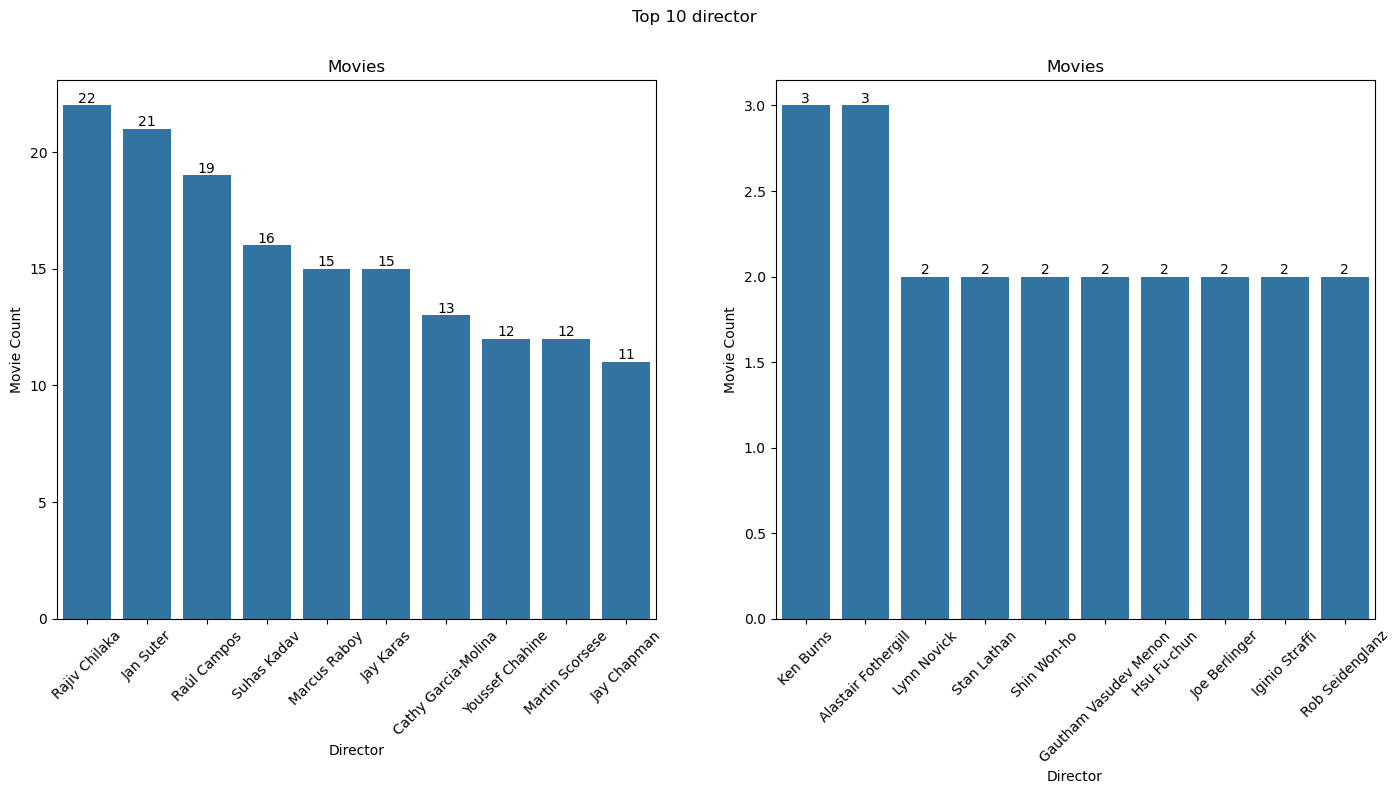

In [352]:
plt.figure(figsize=(17,7))
plt.suptitle("Top 10 director")

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp, x="director",
                    order=df_movies_temp["director"].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Director")
plt.ylabel("Movie Count")



plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp, x="director",
                    order=df_tvs_temp["director"].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Director")
plt.ylabel("Movie Count")
plt.show()

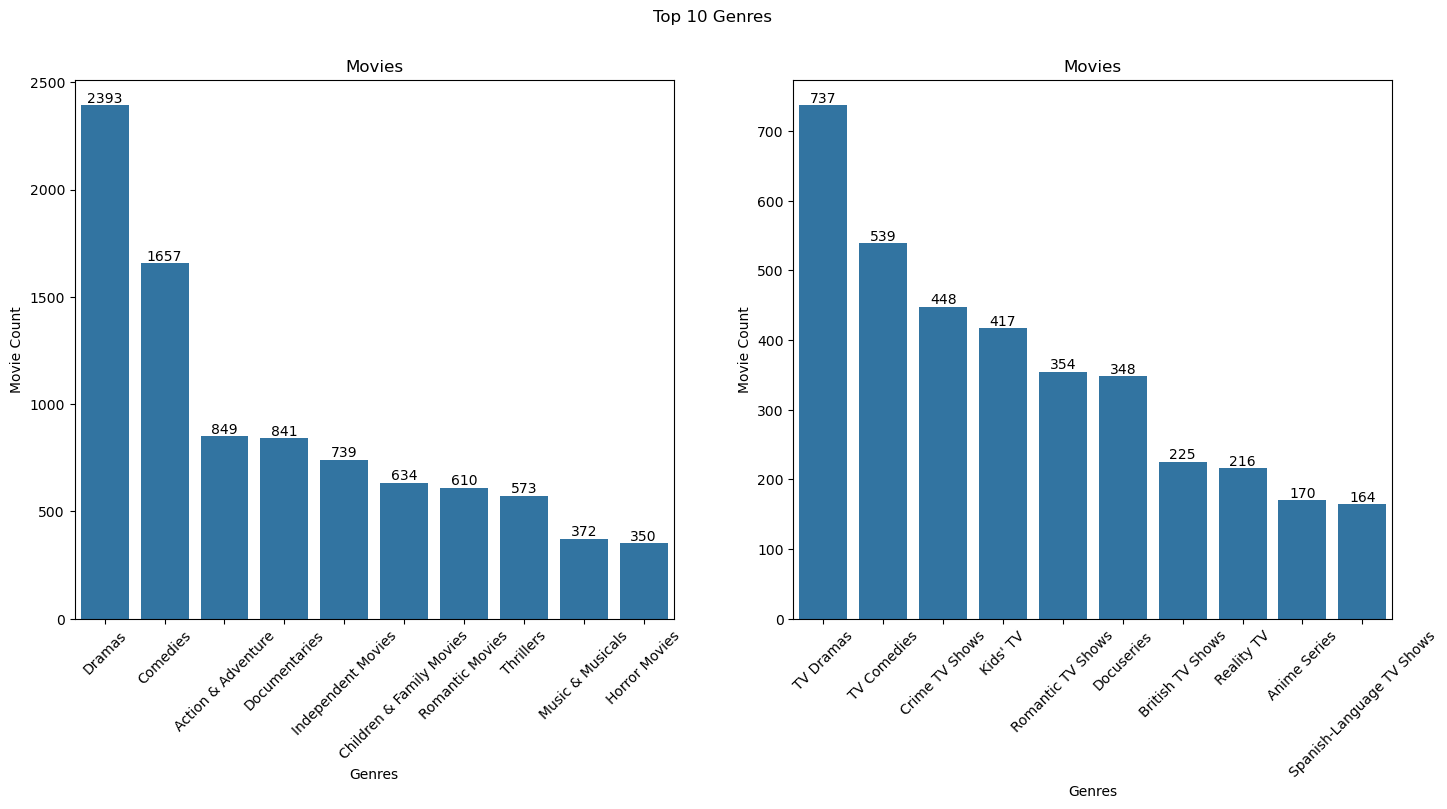

In [353]:
df_movies_temp=df_movies.drop_duplicates(subset=["genre","title"])
df_tvs_temp=df_tvs.drop_duplicates(subset=["genre","title"])

plt.figure(figsize=(17,7))
plt.suptitle("Top 10 Genres")

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp, x="genre",
                    order=df_movies_temp["genre"].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Movie Count")


plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp, x="genre",
                    order=df_tvs_temp["genre"].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Movie Count")

plt.show()

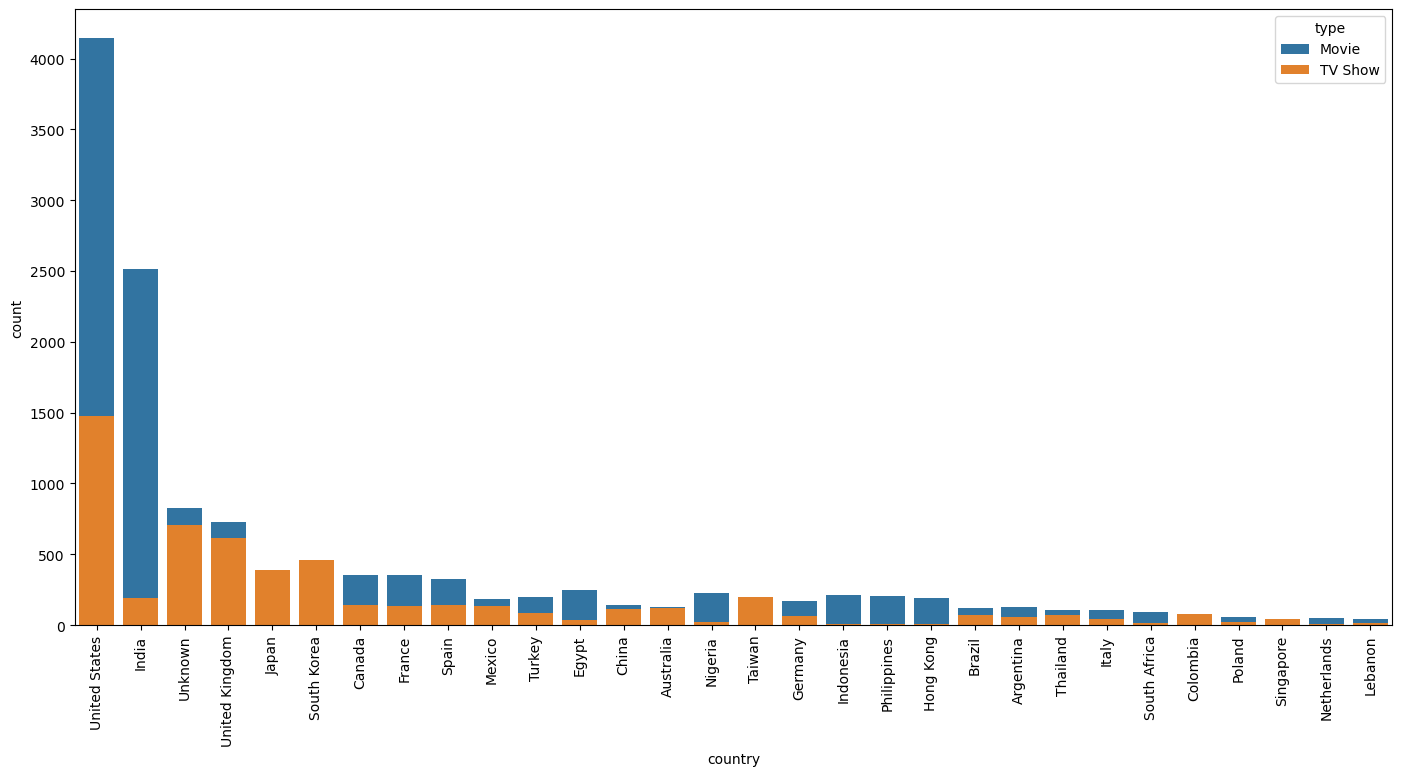

In [354]:
df_temp=df_new.drop_duplicates(subset=["genre","title"])


plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.countplot(data=df_temp,x="country",hue="type",dodge=False,
              order=df_temp["country"].value_counts().head(30).index)
plt.show()

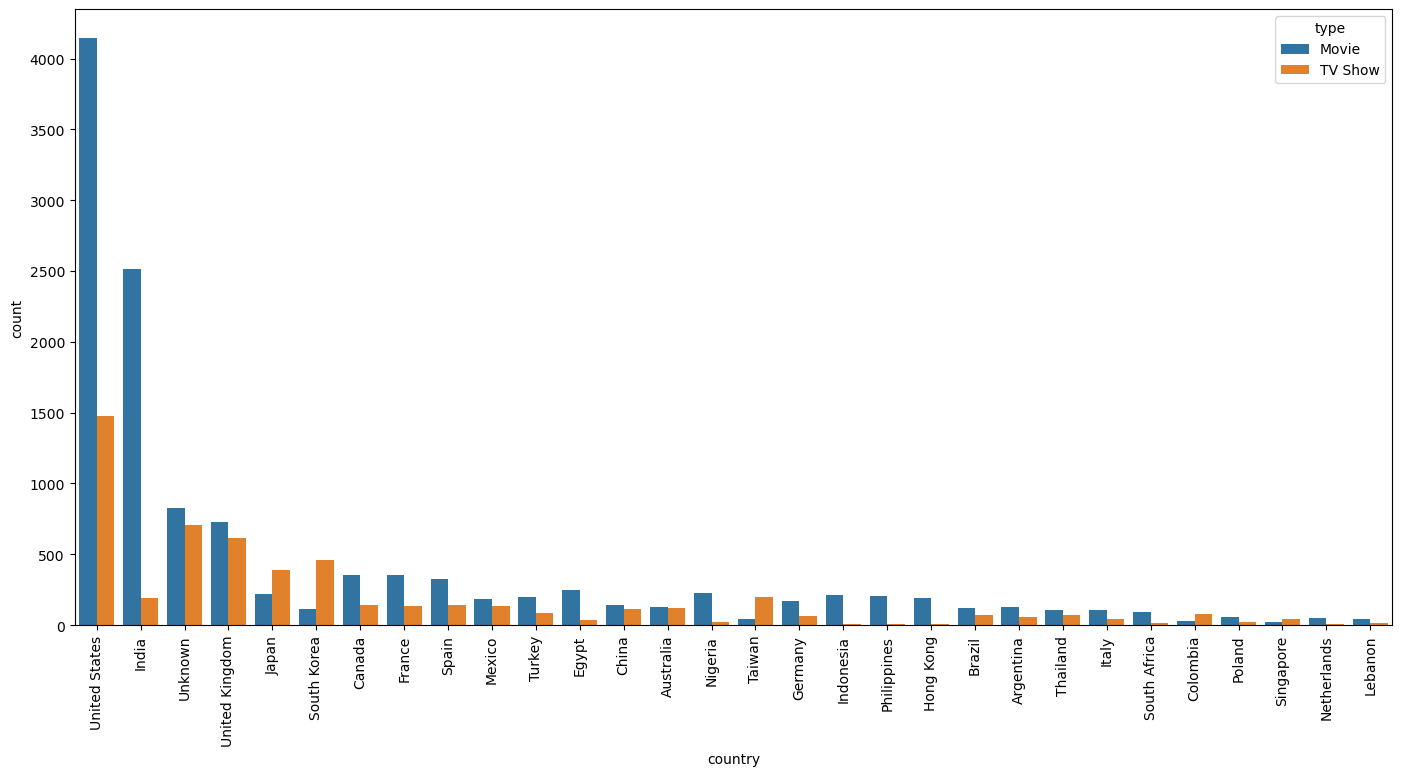

In [355]:
df_temp=df_new.drop_duplicates(subset=["genre","title"])


plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.countplot(data=df_temp,x="country",hue="type",dodge=True,
              order=df_temp["country"].value_counts().head(30).index)
plt.show()

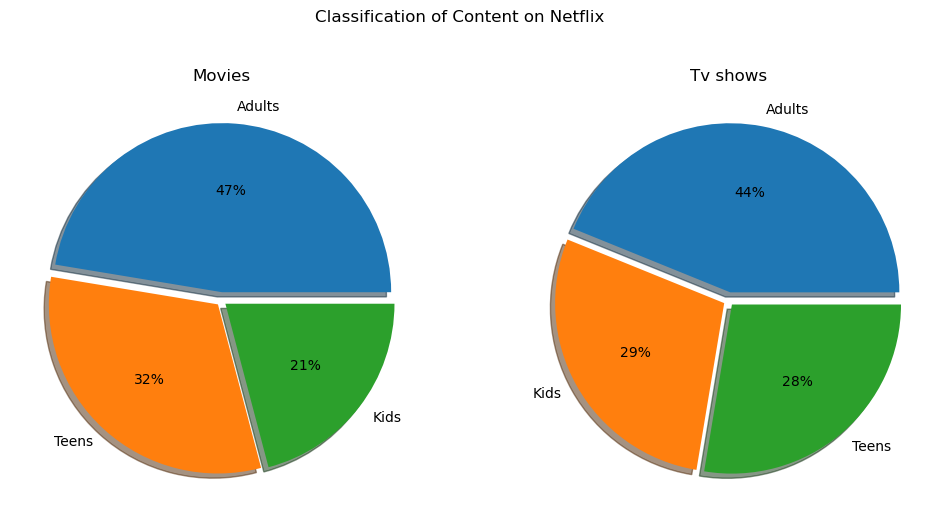

In [356]:
df_movies_temp=df_movies.drop_duplicates(subset=["rating","title"])
df_tvs_temp=df_tvs.drop_duplicates(subset=["rating","title"])

plt.figure(figsize=(12,6))
plt.suptitle("Classification of Content on Netflix")


plt.subplot(1,2,1)
plt.pie(df_movies_temp["rating"].value_counts(), labels=df_movies_temp["rating"].value_counts().index,
        autopct="%.0f%%",explode=(0.05,0.03,0.03),shadow=True)
plt.title("Movies")

plt.subplot(1,2,2)
plt.pie(df_tvs_temp["rating"].value_counts(),labels= df_tvs_temp["rating"].value_counts().index,
        autopct="%.0f%%",explode=(0.05,0.03,0.03),shadow=True)
plt.title("Tv shows")

plt.show()  

In [357]:
df_movies_temp["rating"].value_counts()

rating
Adults    2858
Teens     1913
Kids      1260
Name: count, dtype: int64

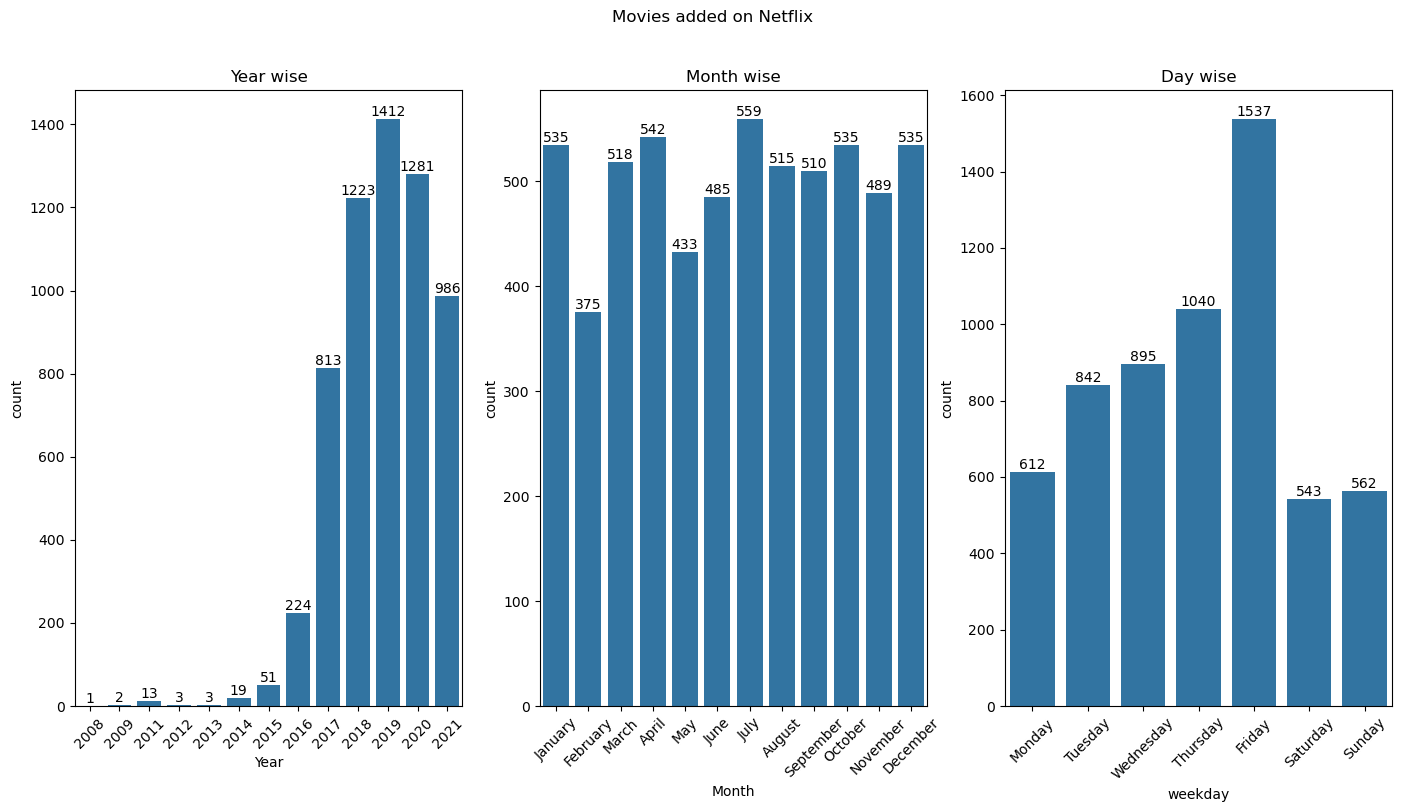

In [358]:
df_movies_temp=df_movies.drop_duplicates(subset=["year","title"])

mv_year=df_movies_temp["year"].value_counts()
mv_year.sort_index(inplace=True)

month_order=["January","February","March","April","May","June","July","August","September",
             "October","November","December"]
mv_month=df_movies_temp["month_name"].value_counts().loc[month_order]

day_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
mv_day=df_movies_temp["weekday"].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle("Movies added on Netflix")

plt.subplot(1,3,1)
label=sns.countplot(data=df_movies_temp, x="year", order=mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.title("Year wise")

plt.subplot(1,3,2)
label=sns.countplot(data=df_movies_temp, x="month_name", order=mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.title("Month wise")

plt.subplot(1,3,3)
label=sns.countplot(data=df_movies_temp, x="weekday", order=mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel("weekday")
plt.title("Day wise")
    
plt.show()